# Введение
В любом эксперименте важной частью, является представление данных в удобном виде. Для этого существует большое количество различных библиотек для визуализации. В этой статье мы познакомимся с одной из новых библиотек - [Plotly](https://plot.ly/python/) 

Из плюсов библиотеки отмечу: 
 * Отличную [документацию](https://plot.ly/python/) с большим количеством примеров. 
 * Интерактивные графики (возможность узнать значение точки, выделить нужную часть и тд. И все это без дополнительного написания кода). 
 * От той же компании существует проект [Dash](https://dash-gallery.plotly.host/Portal/) который позволяет строить красивую аналитику на подобии tableau.
 * Много возможностей при работе с датасетами (об этом ниже)

# Введение
## Подготовка
0. (необязательно) Создадим новое окружение `conda create --name visual` 
1. Активируем его `conda activate visual`
2. Установим pandas и  numpy и Jupyter `conda install numpy pandas jupyter`
3. Скачать датасет "Титаник" (добавить ссылку)


## Установка Plotly
Установка Plotly достаточно сложная (не в одну строчку)
Приведем тут, что говорит нам [документация](https://plot.ly/python/getting-started/)

1. `conda install plotly` (может возникать проблема No module named 'plotly', тогда пропишите pip install plotly)

2. Дальше если вы работаете
 через Jupter:

`conda install notebook ipywidgets`

через Jupterlab: 
```
conda install jupyterlab
conda install ipywidgets
```

Если через VS code ничего не надо

Проверим, что все работает (создадим точки по синусу):

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

x = np.linspace(0, 10, 100)
y = np.sin(x)

fig = px.scatter(x=x, y=y)
fig.show()

## Static режим
Также для сохранения графиков (как картинки, либо вывода в не интерактивный режиме) необходимо прописать (в терминале): 
`conda install -c plotly plotly-orca psutil requests`

В случае если не работает, рекомендую посмотреть этот [раздел](https://plot.ly/python/orca-management/), если не помогло (особенно на Mac), рекомендую проделать все действия от [сюда](https://github.com/plotly/orca)
После этого график можно отобразить в не интерактивном режиме либо сохранить. Доступные форматы: eps, png, jpeg, pdf

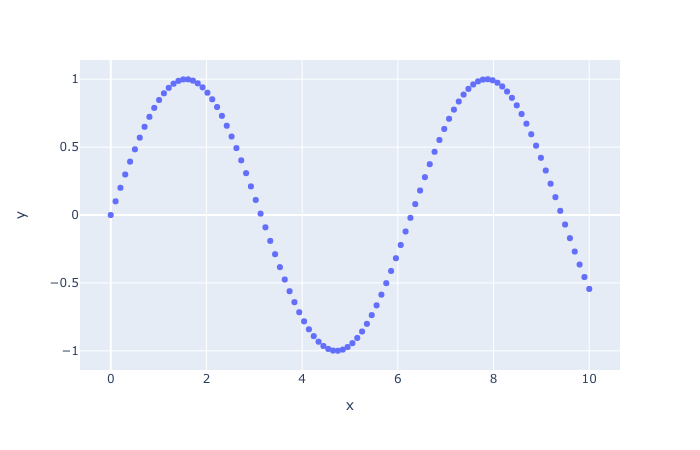

In [3]:
fig.show(renderer="png")
#fig.write_image("images/fig1.png") для сохранения 

# Немного теории
## Основные объекты
Основными объектами в Plotly являются: fig и trace. Fig это все, что будет вывести. На ней может быть и два графика:

In [4]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(y=[4, 2, 1], mode="markers"), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)
fig.show() 

Как видно, fig может состоять из двух частей, но это все fig. fig можно, как создать отдельно например:

In [5]:
fig = go.Figure()
fig.update_layout( autosize=False,
    width=500,
    height=500,
    
    yaxis=dict(
        title_text="Y-axis Title",
        ticktext=["Very long label", "long label", "3", "label"],
        tickvals=[1, 2, 3, 4],
        tickmode="array",
        titlefont=dict(size=30),
    )
)


Так и сразу с точками: 

In [6]:
fig = go.Figure(data=go.Scatter(
    y = np.random.randn(500),
    mode='markers',  
    )
)
fig.show()

Trace это же, те данные которые вы хотите нанести. Перечислим основные:
* Scatter - набор точек
* Line - точки соеденные прямыми
* Error Bars - набор точек с погрешностями
* histogram (Bar) - гистограмма 

и другие...

С Plotly можно работать в двух видах (которые отличаются друг от друга): 
* Полный вид. Код начинается с команды `import plotly.graph_objects as go` 
* Компактный вид. Код начинается с команды `import plotly.express as px`

названия лично мои)



## plotly.express
В этом виде удобно работать с датасетом. Год достаточно получается достаточно лаконичный. Есть дополнительные возможности например простой [способ создания анимации](https://plot.ly/python/animations/), а также параметры facet_col, facet_row (рассмотрим их ниже). Также отметим ограничения: вы не можете построить на одном fig несколько графиков вида express `fig.add_trace(px.Scatter...` - выдаст ошибку  (если знаете, как это можно сделать напишете). Остальные графики надо добавлять с помощью `fig.add_trace(go.Scatter(...))` то есть в полным виде.

### Пример 1 (построение гистограмм, разделенные на subplots по категориям)

In [7]:
# загрузим датасет титаник
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
px.histogram(data, x = "Fare", color = "Survived", facet_col="Pclass", facet_row="Sex", nbins=200)

Давайте рассмотрим приведенный выше пример более подробно:

1. histogram - означает, что мы будем наносить гистограмму
2. data - наш dataframe. Добавлять его не обязательно. Но если же он объявлен, то для того чтобы задать x или y (без него необходимо прописать массивы пример ниже),или для определения парметров, по которым будет разделение, достаточно только записать название столбца.
3. x = "Fare" - стобец, по которому строим гистограмму. Если бы датасет не был указан, мы бы написали `x = data[Fare]`
4. color = "Survived" - параметр, по которому наши данные разделяются на серии
5. facet_col, facet_row - парметры, по которым происходит разделение на subplots

Дополнение: 

1. Если вы указали датасет, то подписи осей, легенда, и прочее будет происходить автоматически по названию столбцов.
2. Если вы нажмете на легенду (в отображенном графике), то вы можете фильтровать данные. (Нажмите на Survived = 0, на графике)

### Пример 2 (Scatter разделенные на subplots по категориям c добавлением шума)
В данном примере датасет добавлен, но мы добавили небольшой шум в данные,чтобы увидеть, где скапливаются точки (иначе эти группы будут в одной точке). Поэтому названия осей по умолчанию будут x,y.

In [9]:
data['Survived']=data['Survived'].astype(str)
fig = px.scatter(data, x=data["SibSp"]+np.random.standard_normal(data["SibSp"].size)/7, y=data["Parch"]+np.random.standard_normal(data["SibSp"].size)/7, color_continuous_scale='Bluered_r', color = "Survived", facet_col="Sex", title= "Распределние по SibSp")
fig.update_traces(marker_symbol= 100,marker=dict(size=8,opacity = 0.70,
                              line=dict(width=2)))

fig.update_layout(template="ggplot2", yaxis_title="Parch")
fig.update_xaxes(title_text="xaxis 1 title", row=1, col=1)
fig.update_xaxes(title_text="xaxis 2 title", row=1, col=2)
fig.show()
data['Survived']=data['Survived'].astype(int)

Давайте рассмотрим приведенный выше пример более подробно:

1. scatter - строим точки
2. `+np.random.standard_normal(data["SibSp"].size)/7` - добавление шума 
3. color_continuous_scale='Bluered_r' - меняем цвета для легенды (по умолчанию был желтый очень режет глаз)
4. `fig.update_traces(marker_symbol= 100,marker=dict(size=8,opacity = 0.70,line=dict(width=2)))`:
* `marker_symbol = 100` тип маркера:кольцо
* дальше пропишем (как для словаря) парметры `size` - размер, `opacity` - прозрачность, `line=dict(width=2))` - толщина линии
5. `fig.update_layout(template="ggplot2", yaxis_title="Parch")` - обновляем fig: используем другой дизайн, и меняем название оси Y (если написать такое же для X, то изменится только название под одним subplot)
6. `fig.update_xaxes(title_text="xaxis 1 title", row=1, col=1)` - прописываем название оси для subplot
7. `data['Survived']=data['Survived'].astype(str)` - применяем для того, чтобы тип был дискретным. Иначе будет непрерывный (попробуйте убрать эту строчку)

Дополнение: 

1.[список маркеров](https://plot.ly/python/marker-style/) 

## plotly.graph_objects

В этом режиме, уже доступна более тонкая настройка, сразу при создании Trace, но и код получается более объемный. Это увидим на примерах ниже:

# Построение основных графиков
Давайте посмотрим, как можно построить основные графики в Plotly (в двух режимах)

## Scatter plot (Точечный график) 
Обычно возникающая задача на лабораторных работах:
Имеется две серии данных (c погрешностями). Необходимо нанести их на один график и построить аппроксимирующие функции.

Создадим DataFrame, с двумя сериями. Столбец `type` отвечает за номер серии.

In [10]:
x1 = np.linspace(-2,2 ,25) + np.random.randn()
x2 = np.linspace(-3,3 ,25) + np.random.randn()
e = np.random.sample(50)*2

y1 = x1 - 6
y2 = np.power(x2, 3) + 3
df = pd.DataFrame({'x':np.append(x1,x2),'y':np.append(y1,y2),'type':np.repeat([1,2], 25),'err':e})
df["type"] = df["type"].astype(str)
df.head()

,x,y,type,err
0,-2.522217,-8.522217,1,1.053717
1,-2.355550,-8.355550,1,1.332996
2,-2.188883,-8.188883,1,1.355809
3,-2.022217,-8.022217,1,1.434369
4,-1.855550,-7.855550,1,1.108714


### Plotly Express


In [11]:
fig = px.scatter(df,x='x', y='y', color='type',error_y='err', title = 'example_1', trendline = 'ols', color_continuous_scale='Bluered_r')

fig.show()
# results = px.get_trendline_results(fig)
# print(results)

Пояснение к примеру:

1. `df` - текущий data frame с которым мы работаем.
2. `x,y` - данные, которые мы строим. Можно, как указать названия столбцов текущего Data frame, так и указать Series или Array
3. `color` - название колонки, по которой разделены данные на категории, в нашем это 1,2 (обратите внимание, что как строки). Аналогично работает symbol (только разные категории, отличаются разными символами) 
4. `title` - название графика
5. `trendline` - аппроксимация, значение аргумента - метод аппроксимации.
6. error_y='err' - значение погрешности (массив)
7. df['type'] = df['type'].astype(str) - необходимо добавить чтобы параметр type был дискретный

[Более подробно](https://plot.ly/python-api-reference/generated/plotly.express.scatter.html#plotly.express.scatter)

Получение результатов аппроксимации немного проблематично, для желающих [документация](https://plot.ly/python/linear-fits/)

### plotly.graph_objects
Построем то же, самое через полную версию.


In [12]:
import plotly.graph_objects as go
df["type"] = df["type"].astype(int)# необходмо, чтобы снова сделать параметр числовым чтобы можно было делать сравнение
X_1 = df[df['type']==1]['x']
X_2 = df[df['type']==2]['x']
Y_1 = df[df['type']==1]['y']
Y_2 = df[df['type']==2]['y']

z = np.polyfit(X_2, Y_2, 1)
p = np.poly1d(z)
xp = np.linspace(min(X_2), max(X_2), 50)
fig = go.Figure()
# апроксимацию смотри в выпуске про numpy
# Add traces

fig.add_trace(go.Scatter(x=X_1, y=Y_1,
                    mode='markers',
                    name='x'))
fig.add_trace(go.Scatter(x=X_2, y=Y_2,
                    mode='markers',
                    name='$x^2$',
                    error_x = dict(
                        type='constant',value=0.2,
                        color='purple')))
fig.add_trace(go.Line(x= xp, y = p(xp)))
fig.show()

/Users/pavel/opt/anaconda3/envs/visual/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Пояснения:

1. go.Scatter - добавление на `fig`, точек типа Scatter. Тоесть точек от x и y.

2. Параметры: 
* `x,y` - данные (Series, Array like)
* `mode` - просто точки, просто линии, точки + линии (marker,line, marker + line)
* `name` - название для легенды (поддерживает latex)
* `error_x = dict` - словарь, так как много параметров
* `type='constant' - тип погрешности: константа (есть также проценты, массив), значение константы
* `value=0.2` - значение погрешности
* `color='purple'` - цвет

Как видно из данного примера в полном режиме доступно больше возможностей для настройки, но и код получается более длинным. 

## 3D scatter plot
[Документация](https://plot.ly/python/3d-scatter-plots/)

На первом курсе возниквает задача построить эллипсоид инерции. Давайте построим это с помощью plotly.
Создадим набор точек:


In [13]:
omega =  np.linspace(0 , 2*np.pi , 50)
phi = np.linspace(-np.pi/2 , np.pi/2 ,50)
a,b,c = 1,2,3
x = []
y = []
z = []
for i in omega:
    for j in phi:
        x.append(a * np.sin(i)*np.cos(j))
        y.append(b * np.sin(i)*np.sin(j))
        z.append(c * np.cos(i))


### Plotly Express

In [14]:
fig = px.scatter_3d(x=x, y=y, z=z)
fig.show()

### plotly.graph_objects

In [15]:
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
   mode='markers')])
fig.show()

##

## Гистограммы 
[документация](https://plot.ly/python/histograms/)
Давайте вернемся к нашему датасету "Титаник"


In [84]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Посмотрим распрередление по возрастам среди мужчин и женщин (выживших)


In [85]:
fig = px.histogram(data[data["Survived"]==1], x= "Age", nbins=50, color="Sex")
fig.show()

Обратите внимание, что мы указываем именно значения, а не значения и их количество (построение такой диаграммы будет ниже).

Пояснения:

1. Параметры: 
* `x= "Age"` - данные по которым строиться гистограмма (массив)
* `color='Sex'` - построение гистограмм по типу, в нашем случае по типу пол.
* `nbins` - количество столбцов.

Дополнение: 

1. Напомню, что нажимая на легенду (например на Sex = female), можно фильтровать данные.     2. В вверхней части окна отображения (где кнопка фотоаппарат, лупа и тд) есть кнопка `Compare data on hover`, нажав на которую, при наведении на нужный вам столбец будут отображаться сразу данные сразу о двух типов.

В приведенном выше примере данные суммировались, из-за чего сравнить их было проблематично. Давайте отобразим данные по другому (заодно посмотрим, как это можно сделать в полном режиме):

In [136]:

data_male = data[(data["Survived"]==1) & (data["Sex"] == 'male')]
data_female = data[(data["Survived"]==1) & (data["Sex"] == 'female')]

fig1 = go.Figure()
fig1.add_trace(go.Histogram(x=data_male["Age"],name = 'male'))
fig1.add_trace(go.Histogram(x=data_female["Age"],name = 'female'))

fig2 = go.Figure()
fig2.add_trace(go.Histogram(x=data_male["Age"],name = 'male'))
fig2.add_trace(go.Histogram(x=data_female["Age"],name = 'female'))

fig3 = go.Figure()
fig3.add_trace(go.Histogram(x=data_male["Age"],name = 'male'))
fig3.add_trace(go.Histogram(x=data_female["Age"],name = 'female'))

fig1.update_layout(title_text=r"barmode='default'")

fig2.update_layout(barmode='stack',  title_text=r"barmode='stack'")

fig3.update_layout(barmode='overlay',  title_text=r"barmode='overlay'")
fig3.update_traces(opacity=0.75)

fig1.show()
fig2.show()
fig3.show()

#### facet\_row и facet_сol (plotly.express)
Давайте посмотрим полезные параметры `facet_col` (или `facet_row`)  (только для plotly express)
Распределение по ценам на билет

In [23]:
px.histogram(data, x = "Fare", color = "Survived", facet_col="Pclass", facet_row="Sex", nbins=200)

Пояснения: 
* `facet_col="Pclass"` - строит наши графики на отдельных колонках, для которых соответственно Pclass = 1,2,3 
* `facet_row="Sex"` - аналогично, только графики располагаются в разных рядах

Итог: имеем распределения по классам и полу в одну строчку.

## 2d Histogram

Пример из [документации](https://plot.ly/python/2D-Histogram/)

In [137]:
import numpy as np
np.random.seed(1)

x = np.random.randn(500)
y = np.random.randn(500)+1

fig = go.Figure(go.Histogram2d(
        x=x,
        y=y
    ))
fig.show()

## Смешенные графики
Давайте посмотрим, как можно использвать разные типы графиков для одних данных

Примеры взяты от [сюда](https://plot.ly/python/plotly-express/#plotly-express)

In [140]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="rug", marginal_x="histogram")
fig

In [142]:
df = px.data.iris()
fig = px.density_heatmap(df, x="sepal_width", y="sepal_length", marginal_x="rug", marginal_y="histogram")
fig.show()